I had been watching the NBA finals (great series!) and noticed that both teams got some really friendly rolls, particularly at their home court. At one point a Steph Curry 3 hit the front rim, bounced up to almost the top of the backboard, came down and rattled off the back rim and through the hoop. So I started to get suspicious. Does Oracle Arena have soft rims that may prefentially benefit the Warriors game?

Let's look at the data!

(I'm going to go through my reasoning step by step here. Hopefully this is instructive for how to think through a problem.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy as sp

%matplotlib inline
sns.set_style("darkgrid")

I got the team statistics for each game from 2014-2018 from hte following Kaggle dataset: https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018'''

In [2]:
df = pd.read_csv('nba.games.stats.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


The first thing I'm going to do is convert the Date field into a datetime object. This will make it easier to select data from specific dates (e.g. certain seasons).

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

If the rims at Oracle Arena are softer rims, then that would  lead to higher shooting percentage. Let's see if teams shoot better at Oracle than at other Arenas.

Shooting percentage at Oracle Arena is greater than 19 out of 29 areas
3 pt shooting percentage at Oracle Arena is greater than 26 out of 29 areas


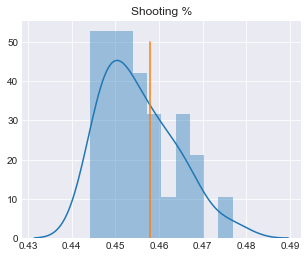

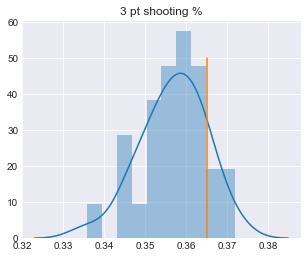

In [4]:
# Get data for all games played at Oracle Arena
dfOracleGames = df[(df['Opponent']=='GSW') | ((df['Team']=='GSW') & (df['Home']=='Home'))]
dfOtherGames = df[(df['Opponent']!='GSW') | ((df['Team']=='GSW') & (df['Home']=='Away'))]

# shooting percentages at Oracle
shootPerc_Oracle = dfOracleGames['FieldGoals'].sum()/dfOracleGames['FieldGoalsAttempted'].sum()
shootPerc3_Oracle = dfOracleGames['X3PointShots'].sum()/dfOracleGames['X3PointShotsAttempted'].sum()

# shooting percentages at other Arenas--sorted by arena
teamWise = dfOtherGames.groupby(['Opponent']).sum()
shootPerc_Other = teamWise['FieldGoals']/teamWise['FieldGoalsAttempted']
shootPerc3_Other = teamWise['X3PointShots']/teamWise['X3PointShotsAttempted']

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(shootPerc_Other, bins=10)
plt.plot([shootPerc_Oracle, shootPerc_Oracle], [0, 50])
plt.title('Shooting %')
print("Shooting percentage at Oracle Arena is greater than %d out of %d areas" % (np.sum(shootPerc_Oracle>shootPerc_Other), len(shootPerc_Other)))

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(shootPerc3_Other, bins=10)
plt.plot([shootPerc3_Oracle, shootPerc3_Oracle], [0, 50])
plt.title('3 pt shooting %')
print("3 pt shooting percentage at Oracle Arena is greater than %d out of %d areas" % (np.sum(shootPerc3_Oracle>shootPerc3_Other), len(shootPerc3_Other)))


These results show that shooting percentages are higher at Oracle Arena than most other arena's. But does this mean the rims are more forgiving? Not quite yet. The Warriors have some great shooters, and they account for about half the shots taken at the Arena, so the percentages could be higher simply because of who is taking them.

So what does it look like if we take the Warrior out of the picture?

Shooting percentage at Oracle Arena is greater than 0 out of 29 areas
3 pt shooting percentage at Oracle Arena is greater than 1 out of 29 areas


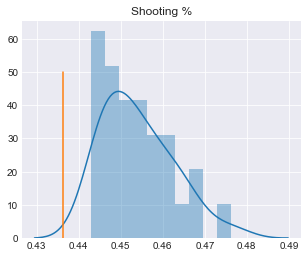

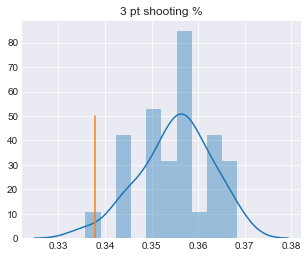

In [5]:
teams = np.unique(df["Opponent"])
teams = teams[teams!="GSW"]

dfNoGSW = df[df["Team"].isin(teams)]
dfOracleGames = dfNoGSW[(dfNoGSW['Opponent']=='GSW')]
dfOtherGames = dfNoGSW[(dfNoGSW['Opponent']!='GSW')]

# shooting percentages at Oracle
shootPerc_Oracle = dfOracleGames['FieldGoals'].sum()/dfOracleGames['FieldGoalsAttempted'].sum()
shootPerc3_Oracle = dfOracleGames['X3PointShots'].sum()/dfOracleGames['X3PointShotsAttempted'].sum()

# shooting percentages at other Arenas--sorted by arena
teamWise = dfOtherGames.groupby(['Opponent']).sum()
shootPerc_Other = teamWise['FieldGoals']/teamWise['FieldGoalsAttempted']
shootPerc3_Other = teamWise['X3PointShots']/teamWise['X3PointShotsAttempted']

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(shootPerc_Other, bins=10)
plt.plot([shootPerc_Oracle, shootPerc_Oracle], [0, 50])
plt.title('Shooting %')
print("Shooting percentage at Oracle Arena is greater than %d out of %d areas" % (np.sum(shootPerc_Oracle>shootPerc_Other), len(shootPerc_Other)))

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(shootPerc3_Other, bins=10)
plt.plot([shootPerc3_Oracle, shootPerc3_Oracle], [0, 50])
plt.title('3 pt shooting %')
print("3 pt shooting percentage at Oracle Arena is greater than %d out of %d areas" % (np.sum(shootPerc3_Oracle>shootPerc3_Other), len(shootPerc3_Other)))

The shooting percentage for teams playing at Oracle (except for the Warriors) is lower than everywhere else. So maybe the rims are actually less forgiving at Oracle, and the Warriors are even that much better shooters.

Not so fast! Our comparison is still biased. For our Oracle shooting percentage, we're only looking at teams playing away games since we've gotten rid of the Warriors shots. But for all the other games, we're calculating shooting percentages using data from both the home and away teams. It's very likely that teams shoot better at home than away, so the non-Oracle shooting percentages will be higher because they include home games as well.

Next, lets look at only away games.

Shooting percentage at Oracle Arena is greater than 0 out of 29 areas
3 pt shooting percentage at Oracle Arena is greater than 0 out of 29 areas


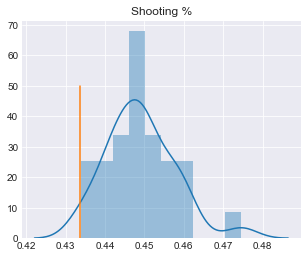

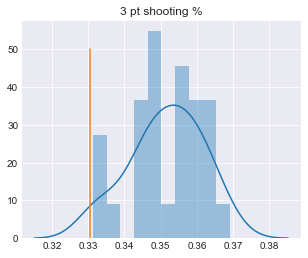

In [6]:
dfOracleGames = dfNoGSW[(dfNoGSW['Opponent']=='GSW')  & (dfNoGSW['Home']=='Away')]
dfOtherGames = dfNoGSW[(dfNoGSW['Opponent']!='GSW')  & (dfNoGSW['Home']=='Away')]

# shooting percentages at Oracle
shootPerc_Oracle = dfOracleGames['FieldGoals'].sum()/dfOracleGames['FieldGoalsAttempted'].sum()
shootPerc3_Oracle = dfOracleGames['X3PointShots'].sum()/dfOracleGames['X3PointShotsAttempted'].sum()

# shooting percentages at other Arenas--sorted by arena
teamWise = dfOtherGames.groupby(['Opponent']).sum()
shootPerc_Other = teamWise['FieldGoals']/teamWise['FieldGoalsAttempted']
shootPerc3_Other = teamWise['X3PointShots']/teamWise['X3PointShotsAttempted']

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(shootPerc_Other, bins=10)
plt.plot([shootPerc_Oracle, shootPerc_Oracle], [0, 50])
plt.title('Shooting %')
print("Shooting percentage at Oracle Arena is greater than %d out of %d areas" % (np.sum(shootPerc_Oracle>shootPerc_Other), len(shootPerc_Other)))

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(shootPerc3_Other, bins=10)
plt.plot([shootPerc3_Oracle, shootPerc3_Oracle], [0, 50])
plt.title('3 pt shooting %')
print("3 pt shooting percentage at Oracle Arena is greater than %d out of %d areas" % (np.sum(shootPerc3_Oracle>shootPerc3_Other), len(shootPerc3_Other)))

Away teams shoot worse at Oracle than they do at every other arena. This adds further support to the above conclusion that the Oracle rims are less forgiving.

But we're not quite there yet. Teams could shoot worse at Oracle for other reasons. Maybe the Warrior play great defense. Or maybe teams shoot more low percentage shots in an attempt to keep up with the high powered Warriors offense.

How can we account for these possibilities? One way is to compare other teams shooting percentages against GSW for when they play at home and when they play at Oracle. But then we're stuck with the home vs. away confound, so we also need to compare home vs. away shooting percentages for each teams against all other teams. If the Oracle rims are more/less forgiving, then the teams home shooting percentages against the Warriors will be closer to each other than the home/away percentages vs. other teams.

Δshooting percentage is greater than 7 out of 29 areas
Δ3 pt shooting percentage is greater than 23 out of 29 areas


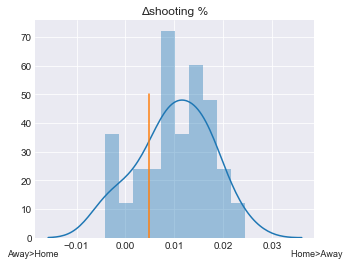

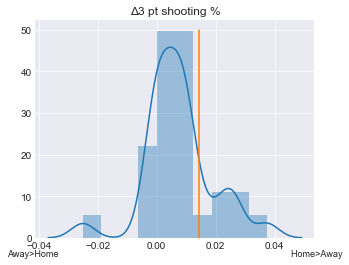

In [7]:
dfVsGSW = dfNoGSW[dfNoGSW["Opponent"]=="GSW"]
dfVsOthers = dfNoGSW[dfNoGSW["Opponent"]!="GSW"]

dfVsGSW_home = dfVsGSW[dfVsGSW["Home"]=="Home"]
dfVsGSW_home = dfVsGSW_home.groupby(["Team"]).sum()
dfVsGSW_away = dfVsGSW[dfVsGSW["Home"]=="Away"]
dfVsGSW_away = dfVsGSW_away.groupby(["Team"]).sum()

dfVsOthers_home = dfVsOthers[dfVsOthers["Home"]=="Home"]
dfVsOthers_home = dfVsOthers_home.groupby(["Team"]).sum()
dfVsOthers_away = dfVsOthers[dfVsOthers["Home"]=="Away"]
dfVsOthers_away = dfVsOthers_away.groupby(["Team"]).sum()


dfGSW = df[df["Team"]=="GSW"]
dfGSW_home = dfGSW[dfGSW["Home"]=="Home"].reset_index()
dfGSW_away = dfGSW[dfGSW["Home"]=="Away"].reset_index()

vsGSWFGPct = dfVsGSW_home["FieldGoals"].sum()/dfVsGSW_home["FieldGoalsAttempted"].sum() -dfVsGSW_away["FieldGoals"].sum()/dfVsGSW_away["FieldGoalsAttempted"].sum()
#vsGSWFGPct = dfVsGSW_away["FieldGoals"]/dfVsGSW_away["FieldGoalsAttempted"]
vsOthersFGPct = dfVsOthers_home["FieldGoals"]/dfVsOthers_home["FieldGoalsAttempted"] -dfVsOthers_away["FieldGoals"]/dfVsOthers_away["FieldGoalsAttempted"]
#vsOthersFGPct = dfVsOthers_away["FieldGoals"]/dfVsOthers_away["FieldGoalsAttempted"]

vsGSW3Pct = dfVsGSW_home["X3PointShots"].sum()/dfVsGSW_home["X3PointShotsAttempted"].sum() - dfVsGSW_away["X3PointShots"].sum()/dfVsGSW_away["X3PointShotsAttempted"].sum()
#vsGSW3Pct = dfVsGSW_away["X3PointShots"]/dfVsGSW_away["X3PointShotsAttempted"]
vsOthers3Pct = dfVsOthers_home["X3PointShots"]/dfVsOthers_home["X3PointShotsAttempted"] - dfVsOthers_away["X3PointShots"]/dfVsOthers_away["X3PointShotsAttempted"]
#vsOthers3Pct = dfVsOthers_away["X3PointShots"]/dfVsOthers_away["X3PointShotsAttempted"]

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(vsOthersFGPct, bins=10)
plt.plot([vsGSWFGPct, vsGSWFGPct], [0, 50])
plt.title('Δshooting %')
ax = plt.gca()
label = ax.set_xlabel('Away>Home                                                                                             Home>Away', fontsize = 9)
ax.xaxis.set_label_coords(0.5, -0.05)
print("Δshooting percentage is greater than %d out of %d areas" % (np.sum(vsGSWFGPct>vsOthersFGPct), len(vsOthersFGPct)))

fig, ax = plt.subplots(figsize=(5,4))
sns.distplot(vsOthers3Pct, bins=10)
plt.plot([vsGSW3Pct, vsGSW3Pct], [0, 50])
plt.title('Δ3 pt shooting %')
ax = plt.gca()
label = ax.set_xlabel('Away>Home                                                                                             Home>Away', fontsize = 9)
ax.xaxis.set_label_coords(0.5, -0.05)
print("Δ3 pt shooting percentage is greater than %d out of %d areas" % (np.sum(vsGSW3Pct>vsOthers3Pct), len(vsOthers3Pct)))

Both histograms show that most of the shooting percentages differentials are greater than zero--teams shoot better at home than away. However, the home/away difference in overall shooting is smaller for team playing at Oracle Arena than at most other arenas. This might be slight evidence that the rims are softer. However, when it comes to three point shooting, the home court advantage is greater when compared with Oracle than most other arenas. So Oracle may be a tougher place to shoot 3s.

Let's check to see if the distribution of team-wise shooting percentage differences are statistically significant different for Oracle and other arenas. I'll use the non-parametric rank sum test, which does not require the underlying distributions to be normal.

In [8]:
vsGSW3Pct = dfVsGSW_home["X3PointShots"]/dfVsGSW_home["X3PointShotsAttempted"] - dfVsGSW_away["X3PointShots"]/dfVsGSW_away["X3PointShotsAttempted"]
vsOthers3Pct = dfVsOthers_home["X3PointShots"]/dfVsOthers_home["X3PointShotsAttempted"] - dfVsOthers_away["X3PointShots"]/dfVsOthers_away["X3PointShotsAttempted"]

vsGSWFGPct = dfVsGSW_home["FieldGoals"]/dfVsGSW_home["FieldGoalsAttempted"] -dfVsGSW_away["FieldGoals"]/dfVsGSW_away["FieldGoalsAttempted"]
vsOthersFGPct = dfVsOthers_home["FieldGoals"]/dfVsOthers_home["FieldGoalsAttempted"] -dfVsOthers_away["FieldGoals"]/dfVsOthers_away["FieldGoalsAttempted"]

shootingStats = sp.stats.ranksums(vsGSWFGPct,vsOthersFGPct)
medDiff = [np.median(vsGSWFGPct), np.median(vsOthersFGPct)]
print("Oracle median Δshooting: %0.2f%%; Other arena median Δshooting: %0.2f%%; Rank sum p-value: %0.3f" % (100*medDiff[0], 100*medDiff[1], shootingStats.pvalue))

shooting3Stats = sp.stats.ranksums(vsGSW3Pct,vsOthers3Pct)
medDiff3 = [np.median(vsGSW3Pct), np.median(vsOthers3Pct)]
print("Oracle median Δshooting: %0.2f%%; Other arena median Δshooting: %0.2f%%; Rank sum p-value: %0.3f" % (100*medDiff3[0], 100*medDiff3[1], shooting3Stats.pvalue))

Oracle median Δshooting: 0.41%; Other arena median Δshooting: 1.04%; Rank sum p-value: 0.228
Oracle median Δshooting: 0.95%; Other arena median Δshooting: 0.69%; Rank sum p-value: 0.883


There is no statically significant advantage for shots at Oracle Arena. Therefore, we find no evidence that the rims at Oracle arena are more friendly than any other arena. This isn't a huge suprise--its likely that the NBA checks rim specs at certain times during the season.

I guess the Splash Brothers are just really that good at throwing basketballs through a hoop!

And congrats to the Raptors for playing tough, old school defense and finding a way to beat them.